# Домашняя работа №6

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels as sm
import matplotlib
import pandas as pd
import io
import requests
import ssl
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
from pylab import *

**1. Загрузить датасет**

In [6]:
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/creditcard.csv"
dataset=pd.read_csv(url)
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [7]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [8]:
filt_df = dataset[['Class','Time']].groupby('Class').count().reset_index()
filt_df.columns = ['Class', 'count']

filt_df

,Class,count
0,0,284315
1,1,492


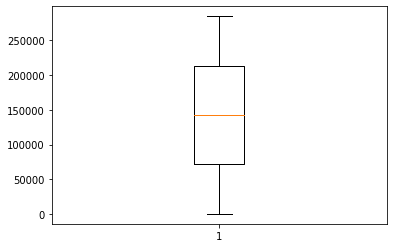

In [9]:
r = boxplot(filt_df['count'], showfliers=False)

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [10]:
true = dataset[dataset['Class'] == 0] ['Amount']
true

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284315, dtype: float64

In [11]:
false = dataset[dataset['Class'] == 1] ['Amount']
false

541         0.00
623       529.00
4920      239.93
6108       59.00
6329        1.00
           ...  
279863    390.00
280143      0.76
280149     77.89
281144    245.00
281674     42.53
Name: Amount, Length: 492, dtype: float64

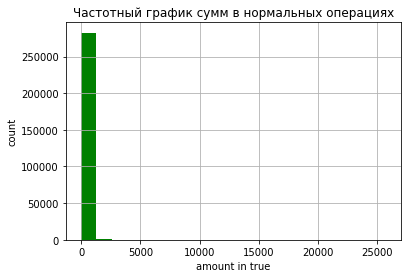

In [12]:
T = plt.hist(true, 20, facecolor='g')

plt.xlabel('amount in true')
plt.ylabel('count')
plt.title('Частотный график сумм в нормальных операциях')
plt.grid(True)
plt.show()

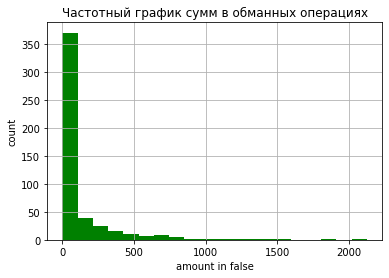

In [13]:
F = plt.hist(false, 20, facecolor='g')

plt.xlabel('amount in false')
plt.ylabel('count')
plt.title('Частотный график сумм в обманных операциях')
plt.grid(True)
plt.show()

Чем больше сумма, тем меньше обманных операций

**5. Построить графики histograms для всех значений**

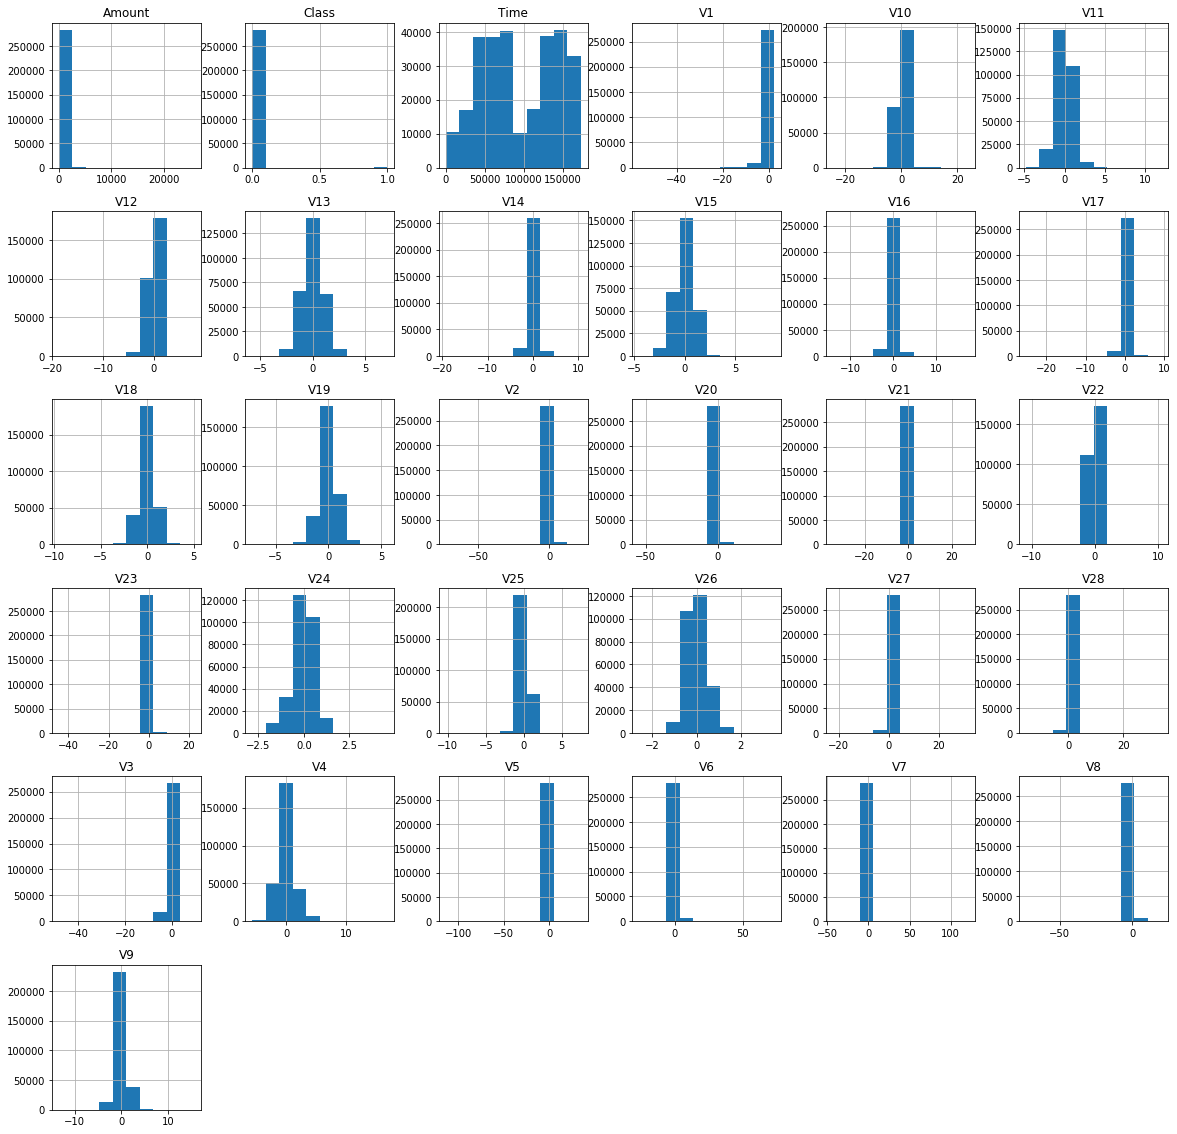

In [14]:
dataset.hist(figsize=(20,20))
plt.show()

**6. Построить матрицу корреляций для всех значений**

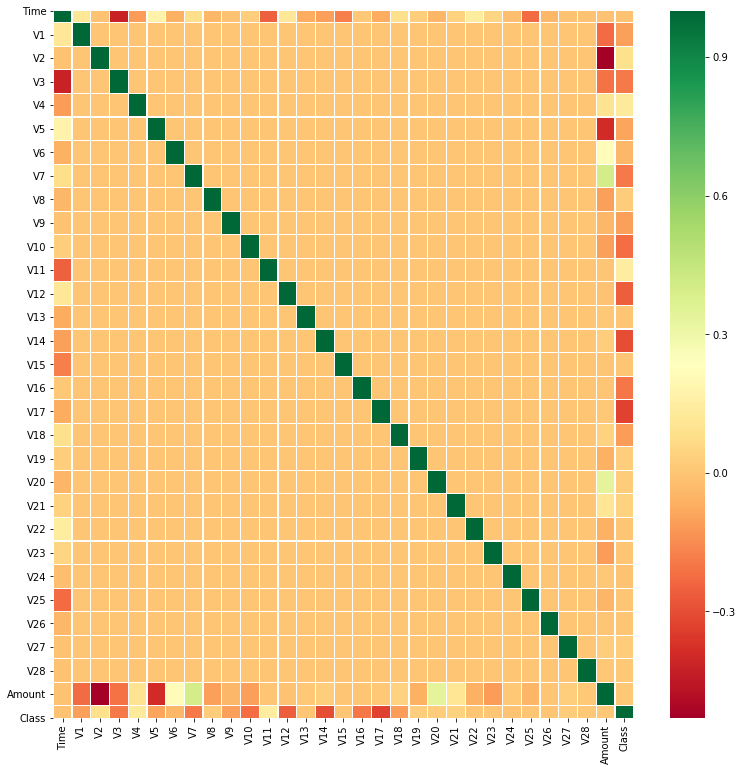

In [15]:
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(dataset.corr(), decimals=2)
sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)

**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать модель деревья решений. Сделать classification report.**

In [17]:
output_y = dataset.iloc[:,:31]

input_x = dataset

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
targets=(output_y.iloc[:,:]==1).idxmax(1)
print(targets.value_counts())
Y=le.fit_transform(targets)

Time      270740
Amount     13688
Class        379
dtype: int64


Выделим из датасета тренировочные и тестовые данные. Тренировочные данные будем использовать для обучения модели. Тестовые данные будем использовать для подсчета качества модели.

In [19]:
from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.3)

Модель Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
# при желании можно изучить и поперебирать другие гиперпараметры 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)


RandomForestClassifier()

No handles with labels found to put in legend.


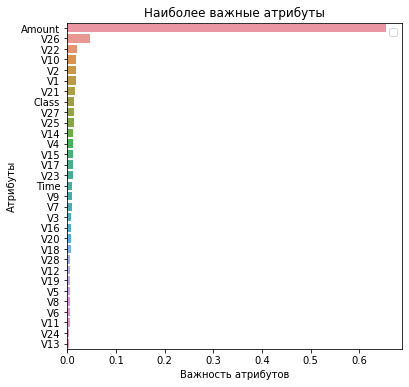

In [21]:
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

Как делать classification report:

In [22]:
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4183
           1       1.00      0.93      0.96        98
           2       1.00      1.00      1.00     81162

    accuracy                           1.00     85443
   macro avg       1.00      0.98      0.99     85443
weighted avg       1.00      1.00      1.00     85443



0.9999180740376625

**8. Нормализовать данные и написать модель Random Forest уже на нормализованных данных. Сделать classification report. Сравнить с результатом, полученном в задаче 7. Нужно ли нормализовывать данные?**

In [24]:
headers = list(dataset.columns.values)

нормализуем параметры

In [25]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(dataset)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352,-1.0
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791,-1.0
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522,-1.0
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386,-1.0
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551,-1.0


восстанавливаем колонки

In [26]:
df_norm.columns = headers
df_norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352,-1.0
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791,-1.0
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522,-1.0
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386,-1.0
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551,-1.0


In [27]:
output_y = df_norm.iloc[:,:31]

input_x = df_norm

In [28]:

le=LabelEncoder()
targets=(output_y.iloc[:,:]==1).idxmax(1)
print(targets.value_counts())
Y=le.fit_transform(targets)

Time     284307
Class       491
V8            1
V18           1
V13           1
V25           1
V28           1
V12           1
V17           1
V3            1
V23           1
dtype: int64


In [29]:
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.3)

Модель Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
# при желании можно изучить и поперебирать другие гиперпараметры 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)


RandomForestClassifier()

classification report

In [31]:
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

C:\Users\sue-z\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00     85297
           3       0.00      0.00      0.00         1

    accuracy                           1.00     85443
   macro avg       0.67      0.67      0.67     85443
weighted avg       1.00      1.00      1.00     85443



0.9999882962910946

No handles with labels found to put in legend.


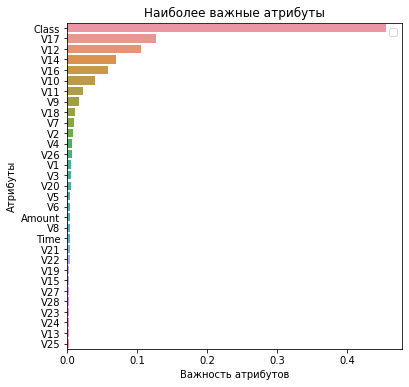

In [32]:
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

Модель "рандомных деревьев" дала точность предсказания порядка 99%. В данной ситуации нормализовать данные не было необходимости.

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные).**

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_norm,
                                                 Y,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

Увеличим количество тренировочных данных (тестовые данные остаются нетронутыми)

In [53]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
print('Количество элементов до операции:', len(X_train))
print('Количество элементов после операции:', len(X_resampled))

C:\Users\sue-z\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Количество элементов до операции: 199364
Количество элементов после операции: 1791162


Мы увеличили количество элементов, и уравняли классы по количеству

In [54]:
unique, counts = np.unique(y_resampled, return_counts=True)
dict(zip(unique, counts))

{0: 199018,
 1: 199018,
 2: 199018,
 3: 199018,
 5: 199018,
 6: 199018,
 7: 199018,
 9: 199018,
 10: 199018}

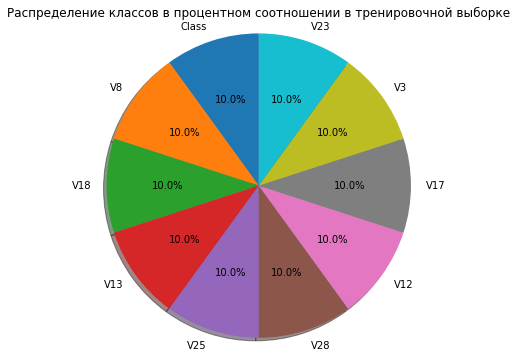

In [55]:
# Построем pie-график
labels = 'Class', 'V8', 'V18', 'V13', 'V25', 'V28', 'V12', 'V17', 'V3', 'V23' 
sizes = [ 199010, 199010, 199010, 199010, 199010, 199010,199010,199010,199010,199010]
explode = (0, 0.0, 0, 0, 0.0, 0.0,0.0,0.0,0.0,0.0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots(figsize=(6, 6))
plt.title('Распределение классов в процентном соотношении в тренировочной выборке')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Но в тестовых данных остается несбалансированность. 

In [56]:
unique, counts = np.unique(y_test_22, return_counts=True)
dict(zip(unique, counts))

{0: 145, 1: 85297, 3: 1}

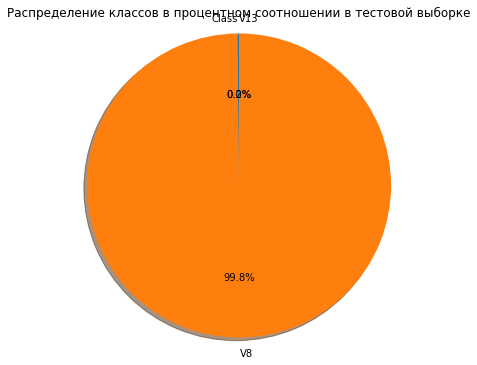

In [57]:
# Построем pie-график
labels = 'Class', 'V8', 'V13'
sizes = [145, 85297, 1]
explode = (0, 0, 0.0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(6, 6))
plt.title('Распределение классов в процентном соотношении в тестовой выборке')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()